In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Dataset

In [3]:
train=pd.read_csv('train.csv', parse_dates=['datetime'])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Explore Data

In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Explore - datetime

In [13]:
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second

In [14]:
print(train.shape)
train.head()

(10886, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


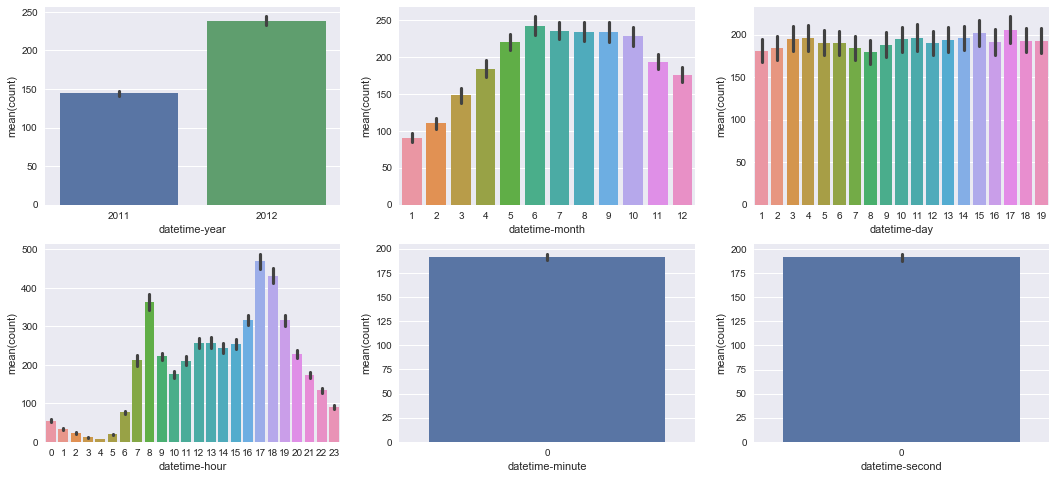

In [23]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
sns.barplot(data=train, x="datetime-year", y='count', ax=ax1)
sns.barplot(data=train, x="datetime-month", y='count', ax=ax2)
sns.barplot(data=train, x="datetime-day", y='count', ax=ax3)
sns.barplot(data=train, x="datetime-hour", y='count', ax=ax4)
sns.barplot(data=train, x="datetime-minute", y='count', ax=ax5)
sns.barplot(data=train, x="datetime-second", y='count', ax=ax6)

** Learned **
* minute와 second는 기록이 되고 있지 않음을 확인, feature로 사용할 필요가 없음
* train/test 데이터는 datetime-day를 기준으로 분류, 그러므로 datetime-day를 feature로 사용해선 안됨

### Explore - workingday

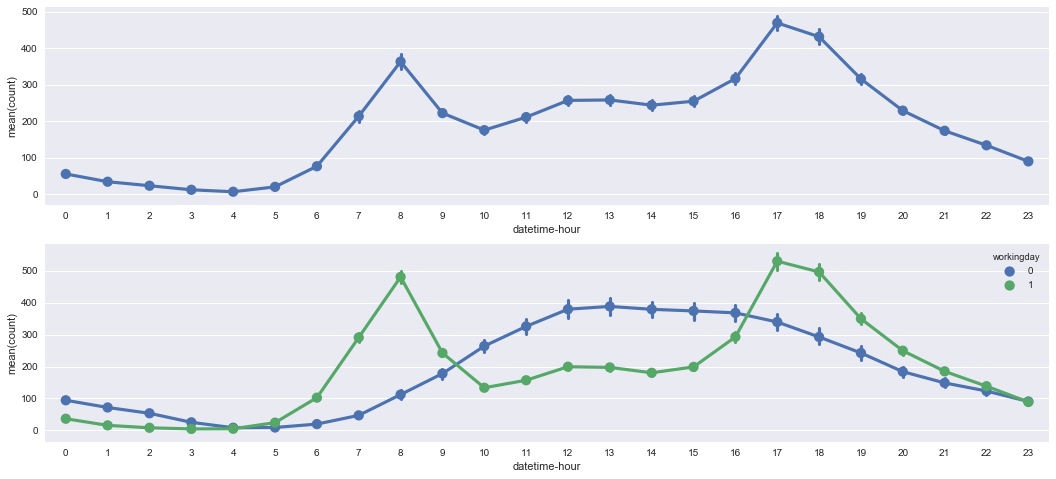

In [24]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

** Learned **
* 주중(월,화,수,목,금)이 주말(토,일)보다 많기 때문에, 두 개를 나눠서 보지 않으면 주말의 특성을 파악할 수 없다.
* 주중(workingday==1)에는 출근 시간과 퇴근 시간대에 대여가 많음을 확인
* 주말(workingday==0)에는 출퇴근 시간보다, 오후시간(11-17)에 대여가 많음

### Explore - dayofweek

In [29]:
# 요일별로 인코딩 ㄱㄱ
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek
print(train.shape)
train[['datetime', 'datetime-dayofweek']].head()

(10886, 19)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


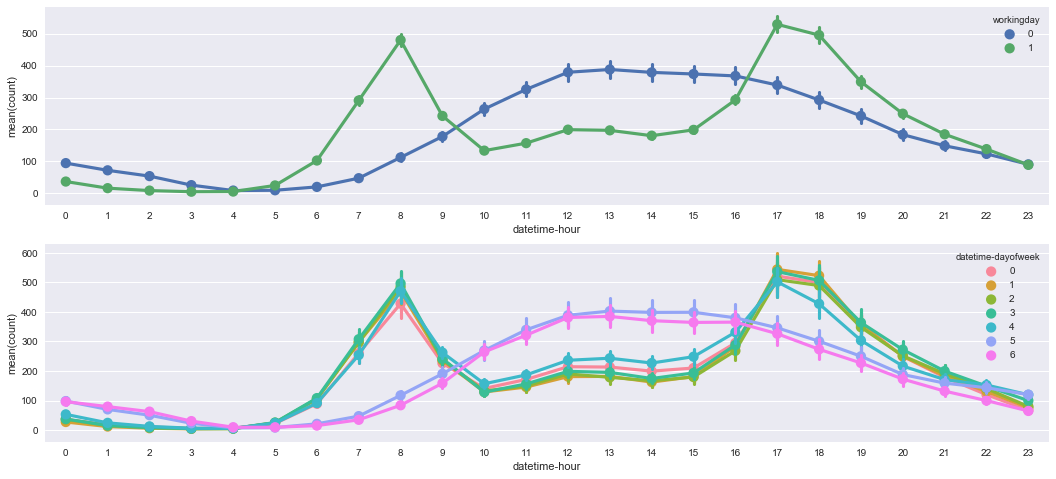

In [36]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

** Learned ** 
* 금요일에 해당하는 그래프를 보면, 12시 이후 대여수가 타평일 보다 높고, 17시 이후의 대여수는 낮은을 확인
* 금요일은 평일에 해당하지만 약간 주말의 특성을 반영함
* 월요일 출근시간대의 대여수 역시, 타 평일 대여수보다 낮음을 확인
* 일반적으로 휴가를 월요일오전과 금요일 오후에 많이 사용하기 때문이라고 추측

### Concatenate year and month

In [39]:
def concat_year_month(datetime):
    return "{}-{}".format(datetime.year, datetime.month)

train['datetime-year-month'] = train['datetime'].apply(concat_year_month)

train[['datetime', 'datetime-year-month']].tail()

,datetime,datetime-year-month
10881,2012-12-19 19:00:00,2012-12
10882,2012-12-19 20:00:00,2012-12
10883,2012-12-19 21:00:00,2012-12
10884,2012-12-19 22:00:00,2012-12
10885,2012-12-19 23:00:00,2012-12


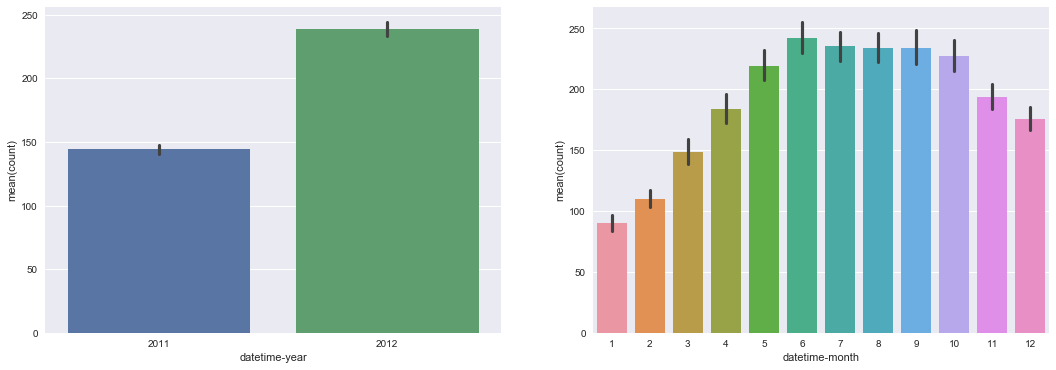

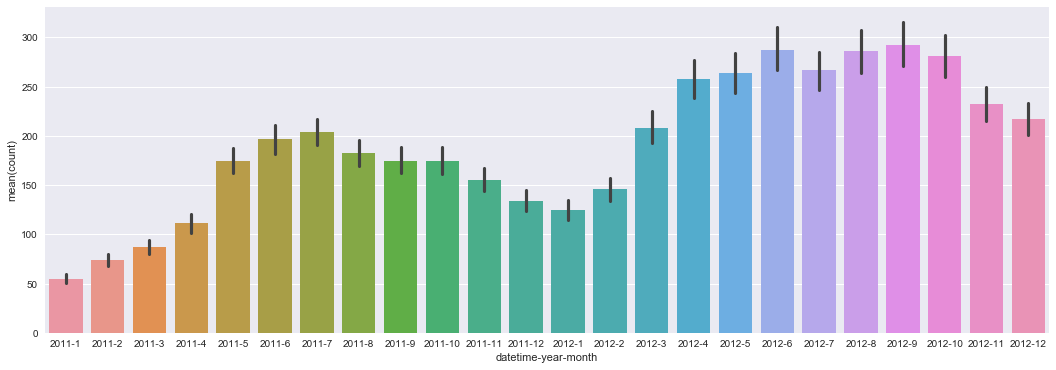

In [51]:
figure, (ax1, ax2) = plt.subplots(1, 2)
figure.set_size_inches(18, 6)

sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)

figure, ax3 = plt.subplots(1, 1)
figure.set_size_inches(18,6)
sns.barplot(data=train, x="datetime-year-month", y="count", ax=ax3)

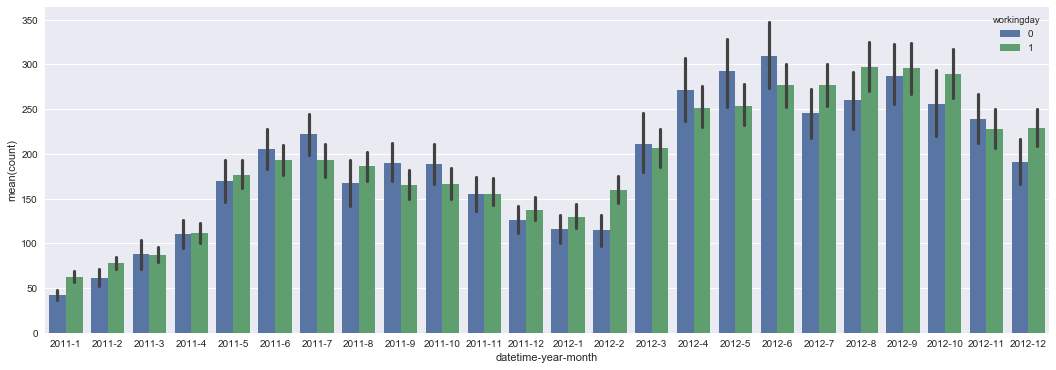

In [54]:
fig = plt.figure(figsize=(18,6))
sns.barplot(data=train, x="datetime-year-month", y="count", hue='workingday',)

** Learned **
* datetime-month 그래프를 보면 1월과 12월의 대여량 차이가 많아 보임
* 하지만 이를 datetime-year-month로 풀어서 보면 2011년 12월과 2012년 1월의 대여량을 차이가 없음을 확임


## Count

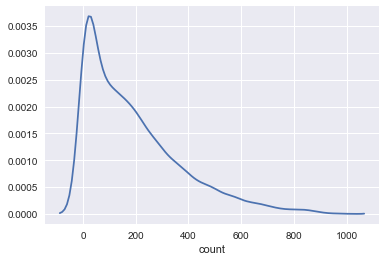

In [56]:
sns.distplot(train['count'], hist=False)

* Count의 분포는 'skewed'되어 있음을 확인

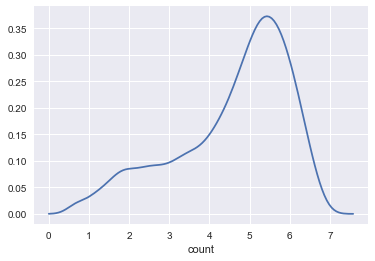

In [74]:
sns.distplot(np.log(train['count'] + 1), hist=False, bins=50)

* log + 1을 통해 skewed 분로를 정규 분포(가오시간 분포)에 맞게 수정

## Reload Dataset

In [78]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
test = pd.read_csv('test.csv', parse_dates=['datetime'])

## Pre-processing

### Parse datetime

In [82]:
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [84]:
test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


## Concatenate year and month

In [85]:
train['datetime-year-month'] = train['datetime'].apply(concat_year_month)
test['datetime-year-month'] = test['datetime'].apply(concat_year_month)

In [90]:
# one-hot encoding
train_year_month = pd.get_dummies(train['datetime-year-month'], prefix='datetime')
test_year_month = pd.get_dummies(test['datetime-year-month'], prefix='datetime')

In [91]:
# concat
train = pd.concat([train, train_year_month], axis=1)
test = pd.concat([test, test_year_month], axis=1)

### Parse dayofweek

In [93]:
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek
test['datetime-dayofweek'] = test['datetime'].dt.dayofweek

In [95]:
# one-hot encoding
train_dayofweek = pd.get_dummies(train['datetime-dayofweek'], prefix='dayofweek')
test_dayofweek = pd.get_dummies(test['datetime-dayofweek'], prefix='dayofweek')

In [99]:
# concat
train = pd.concat([train, train_dayofweek], axis=1)
test = pd.concat([test, test_dayofweek], axis=1)

### Parse season

In [100]:
# one-hot encoding
train_season = pd.get_dummies(train['season'], prefix='season')
test_season = pd.get_dummies(test['season'], prefix='season')

In [106]:
train = pd.concat([train, train_season], axis=1)
test = pd.concat([test, test_season], axis=1)

### Parse weather

In [113]:
train_weather = pd.get_dummies(train['weather'], prefix='weather')
test_weather = pd.get_dummies(test['weather'], prefix='weather')

In [114]:
train = pd.concat([train, train_weather], axis=1)
test = pd.concat([test, test_weather], axis=1)

### Transform Skewed Label

In [111]:
train["log_count_plus"] = np.log(train["count"] +1)
train["recover_count"] = np.exp(train["log_count_plus"]) -1

train[['count', 'log_count_plus', 'recover_count']].head()

,count,log_count_plus,recover_count
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


## Train

In [123]:
# features

features = ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
           'datetime-year', 'datetime-month', 'datetime-hour', 'datetime_2011-11', 'datetime_2011-12', 
            'datetime_2011-2', 'datetime_2011-3', 'datetime_2011-4', 'datetime_2011-5', 'datetime_2011-6', 
            'datetime_2011-7', 'datetime_2011-8', 'datetime_2011-9', 'datetime_2012-1', 'datetime_2012-10',
            'datetime_2012-11', 'datetime_2012-12', 'datetime_2012-2',
            'datetime_2012-3', 'datetime_2012-4', 'datetime_2012-5',
            'datetime_2012-6', 'datetime_2012-7', 'datetime_2012-8', 
            'datetime_2012-9', 'dayofweek_0', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 
            'dayofweek_5', 'dayofweek_6', 'season_1', 'season_2', 'season_3', 'season_4',
           'weather_1', 'weather_2', 'weather_3', 'weather_4']

In [125]:
X_train = train[features]
X_test = test[features]

In [129]:
# Label

label = 'log_count_pluts'
y_train = train['log_count_plus']
y_train.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count_plus, dtype: float64

### Tune Hyper Parameters

In [130]:
from sklearn.metrics import make_scorer

In [131]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = predict
    log_actual = actual
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

### Grid Search

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

In [136]:
n_estimators = 100

max_depth_list = [9, 15, 20, 25, 30]
max_feature_list = [0.1, 0.3, 0.5, 0.7, 0.9]
hyperparameter_list = []

for max_depth in max_depth_list:
    for max_features in max_feature_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      n_jobs=-1,
                                      random_state=37)
        
        score = cross_val_score(model, X_train, y_train, cv=20, \
                                scoring=rmsle_scorer).mean()
        
        print("n_estimators = {0}, max_depth = {1}, max_features = {2}, score = {3:.5f}" \
                  .format(n_estimators, max_depth, max_features, score))
        
        hyperparameter = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
            'score': score,
        }
        
        hyperparameter_list.append(hyperparameter)
        
hyperparameter_list = pd.DataFrame.from_dict(hyperparameter_list)
hyperparameter_list = hyperparameter_list.sort_values("score", ascending=True)

hyperparameter_list.head()

n_estimators = 100, max_depth = 9, max_features = 0.1, score = 0.83382
n_estimators = 100, max_depth = 9, max_features = 0.3, score = 0.55149
n_estimators = 100, max_depth = 9, max_features = 0.5, score = 0.45142
n_estimators = 100, max_depth = 9, max_features = 0.7, score = 0.42015
n_estimators = 100, max_depth = 9, max_features = 0.9, score = 0.40333
n_estimators = 100, max_depth = 15, max_features = 0.1, score = 0.69648
n_estimators = 100, max_depth = 15, max_features = 0.3, score = 0.45302
n_estimators = 100, max_depth = 15, max_features = 0.5, score = 0.37433
n_estimators = 100, max_depth = 15, max_features = 0.7, score = 0.35543
n_estimators = 100, max_depth = 15, max_features = 0.9, score = 0.35196
n_estimators = 100, max_depth = 20, max_features = 0.1, score = 0.66851
n_estimators = 100, max_depth = 20, max_features = 0.3, score = 0.44619
n_estimators = 100, max_depth = 20, max_features = 0.5, score = 0.37122
n_estimators = 100, max_depth = 20, max_features = 0.7, score = 0.352

,max_depth,max_features,n_estimators,score
19,25,0.9,100,0.351272
24,30,0.9,100,0.351602
14,20,0.9,100,0.351718
9,15,0.9,100,0.351963
13,20,0.7,100,0.352918


In [137]:
# Train by Randomforest 
n_estimators = 100
model = RandomForestRegressor(n_estimators=n_estimators,
                             max_depth=25,
                             max_features=0.782782, 
                             n_jobs=-1,
                             random_state=37)

In [139]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=0.782782, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=37,
           verbose=0, warm_start=False)

In [141]:
predictions = model.predict(X_test)

predictions = np.exp(predictions) - 1

print(predictions.shape)
predictions

(6493,)


array([   9.18426772,    4.68046873,    3.07328389, ...,  128.2863801 ,
        109.6000689 ,   64.18624927])

## Submit

In [142]:
submission = pd.read_csv('sampleSubmission.csv')

submission['count'] = predictions

submission.head()

,datetime,count
0,2011-01-20 00:00:00,9.184268
1,2011-01-20 01:00:00,4.680469
2,2011-01-20 02:00:00,3.073284
3,2011-01-20 03:00:00,3.011417
4,2011-01-20 04:00:00,2.469696


In [143]:
submission.to_csv('feed_grid_search.csv', index=False)